In [4]:
%matplotlib inline

import numpy as np
import pysal as ps
import geopandas as gpd
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [10]:
# we use PySAL for loading a test shapefile
# replace this cell if you have a local shapefile and want to use GeoPandas readers

pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)

C:\Users\kendall.fortney\AppData\Local\Continuum\Anaconda3\lib\site-packages\geopandas\plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


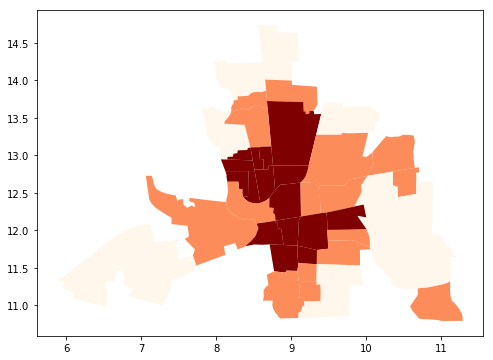

In [11]:
tracts.plot(column='CRIME', scheme='QUANTILES', k=3, colormap='OrRd')


Note that in general, any options one can pass to pyplot in matplotlib (or style options that work for lines) can be passed to the plot() method.

Chloropleth Maps
geopandas makes it easy to create Chloropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

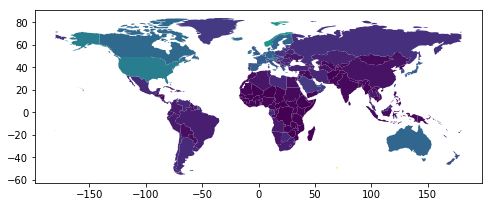

In [12]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')

Choosing colors
One can also modify the colors used by plot with the cmap option (for a full list of colormaps, see the matplotlib website):

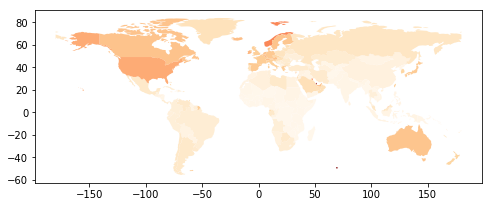

In [13]:
world.plot(column='gdp_per_cap', cmap='OrRd')

The way color maps are scaled can also be manipulated with the scheme option (if you have pysal installed, which can be accomplished via conda install pysal). By default, scheme is set to ‘equal_intervals’, but it can also be adjusted to any other pysal option, like ‘quantiles’, ‘percentiles’, etc.

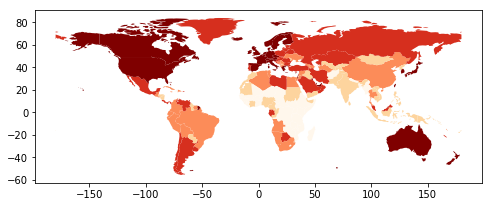

In [14]:
 world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

Maps with Layers
There are two strategies for making a map with multiple layers – one more succinct, and one that is a littel more flexible.

Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

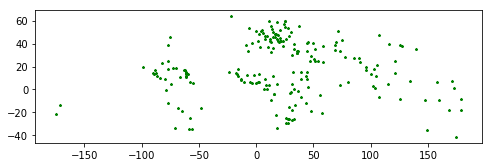

In [15]:
# Look at capitals
# Note use of standard `pyplot` line style options
cities.plot(marker='*', color='green', markersize=5);

# Check crs
cities = cities.to_crs(world.crs)

# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently in the middle of the ocean!

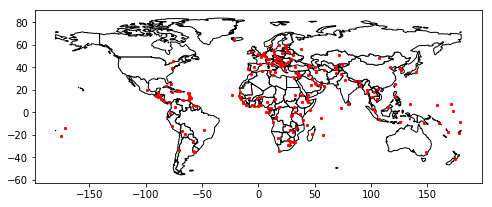

In [16]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

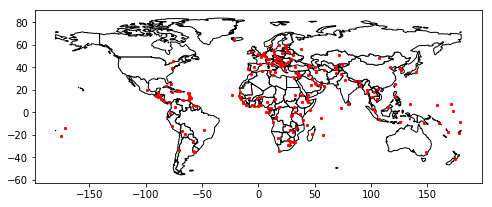

In [17]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')

cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();